# Threshold drought

## Load packages

In [1]:
import hydropandas as hpd
import pandas as pd
import pastas as ps
from scipy import stats as sps

import spei as si

/home/martin/repos/SPEI/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm

## Load data

In [2]:
prec = (
    hpd.PrecipitationObs.from_knmi(
        meteo_var="RH", stn=260, startdate="1995-01-01", enddate="2024-12-31"
    )
    .multiply(1e3)
    .squeeze()
)
prec.index = prec.index.normalize()
evap = (
    hpd.EvaporationObs.from_knmi(
        meteo_var="EV24", stn=260, startdate="1995-01-01", enddate="2024-12-31"
    )
    .multiply(1e3)
    .squeeze()
)
evap.index = evap.index.normalize()

## Calculate precipitation surplus

<Axes: xlabel='YYYYMMDD'>

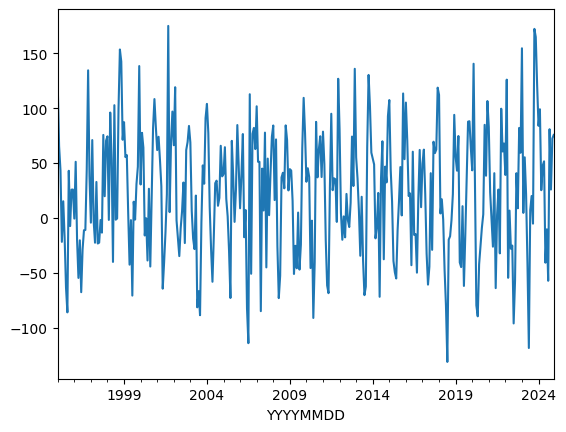

In [3]:
surplusd = prec - evap
surplus = surplusd.resample("MS").sum()
surplus.plot()

## Fit distribution

In [4]:
dist = sps.fisk
sispei = si.SI(
    series=surplus,
    dist=dist,
    timescale=0,
)
sispei.fit_distribution()

## Get threshold

Choose arbitrary threshold based on quantile of the distribution. Can be any threshold the user wants as well. Only then the threshold time series has to be created manually.

In [ ]:
speithr = sispei.ppf(0.3)  # 30% quantile threshold

## Plot threshold

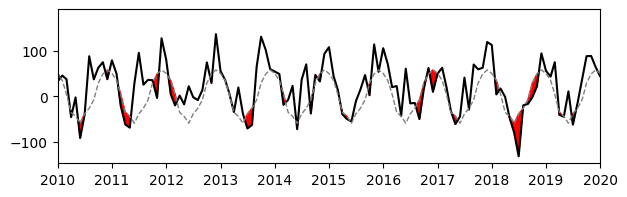

In [6]:
ax = si.plot.threshold(
    series=sispei.series,
    threshold=speithr,
    color="red",
)
_ = ax.set_xlim(pd.Timestamp("2010"), pd.Timestamp("2020"))

## Repeat for head time series

In [7]:
ds = ps.load_dataset("spek_2017")
head = ds["heads"]["B32C0572_DE-BILT"].dropna().loc["1970":]

In [8]:
timescale = 6
sisgi = si.SI(
    head,
    dist=sps.norm,
    timescale=timescale,
    fit_freq="MS",
    normal_scores_transform=True,
    agg_func="mean",
)
sgithr = sisgi.ppf(0.4)  # choose arbitrary threshold

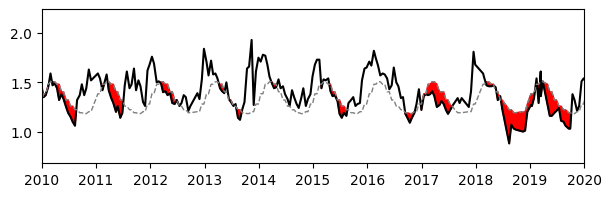

In [9]:
ax = si.plot.threshold(
    series=head.iloc[timescale - 1 :],
    threshold=sgithr,
    color="red",
)
_ = ax.set_xlim(pd.Timestamp("2010"), pd.Timestamp("2020"))